In [0]:
#! wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/wns-analytics-wizard-2019/" "https://datahack-prod.s3.amazonaws.com/train_file/train_NA17Sgz.zip" -O "train_NA17Sgz.zip" -c

In [0]:
#! wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/wns-analytics-wizard-2019/" "https://datahack-prod.s3.amazonaws.com/test_file/test_aq1FGdB.zip" -O "test_aq1FGdB.zip" -c

In [0]:
import pandas as pd
import numpy as np

In [0]:
import zipfile
#with zipfile.ZipFile("/content/train_NA17Sgz.zip", 'r') as zip_ref:
 #   zip_ref.extractall("train")

In [0]:
import zipfile
#with zipfile.ZipFile("/content/test_aq1FGdB.zip", 'r') as zip_ref:
 #   zip_ref.extractall("test")

In [0]:
item = pd.read_csv("train/item_data.csv")

In [7]:
item.shape

(132761, 6)

In [8]:
item.head(20)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239
5,108843,953,9,9,90,703
6,129807,18118,16,56,188,2537
7,44250,17856,16,56,42,9641
8,49862,2868,7,23,219,842
9,77042,4032,17,55,58,623


In [9]:
train = pd.read_csv("train/train.csv")
train.head(5)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [10]:
train.describe()

,user_id,app_code,is_4G,is_click
count,237609.000000,237609.000000,237609.000000,237609.000000
mean,46454.526828,249.099971,0.361312,0.045714
std,26802.726666,135.213609,0.480382,0.208864
min,0.000000,0.000000,0.000000,0.000000
25%,23197.000000,163.000000,0.000000,0.000000
50%,46597.000000,213.000000,0.000000,0.000000
75%,69684.000000,385.000000,1.000000,0.000000
max,92586.000000,522.000000,1.000000,1.000000


0    0.954286
1    0.045714
Name: is_click, dtype: float64

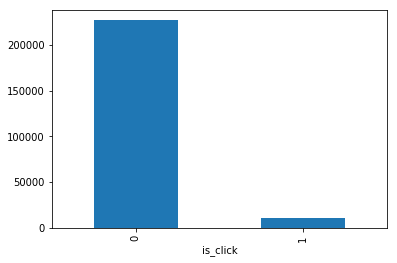

In [11]:
%matplotlib inline

train.groupby('is_click').size().plot(kind = 'bar')
rows = train.shape[0]

click_through_rate = train['is_click'].value_counts()/rows 

click_through_rate


In [12]:
view_log = pd.read_csv("train/view_log.csv")
view_log.head(5)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [13]:
test = pd.read_csv("test/test.csv")
test.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [14]:
train.shape, item.shape, view_log.shape, test.shape

((237609, 7), (132761, 6), (3118622, 5), (90675, 6))

In [0]:
target = train["is_click"] 

test_1 = test.copy()

In [0]:
ite = pd.merge(train, view_log,  on='user_id', how="left")

In [17]:
ite.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-10-21 06:13:00,android,356854,43209
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-10-21 06:13:00,android,356854,66370
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-10-21 17:01:00,android,345289,43209
4,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-10-22 09:54:00,android,406658,43209


In [18]:
train_data = pd.merge(ite, item, on="item_id", how="left")
train_data.shape

(11052882, 16)

In [19]:
train_data.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1,2018-10-21 06:13:00,android,356854,66370,14166.0,4.0,74.0,292.0,3399.0


In [0]:
#train_data.dropna(inplace=True)

In [21]:
train_data.shape

(11052882, 16)

In [22]:
train_data.isnull().sum()

impression_id         0
impression_time       0
user_id               0
app_code              0
os_version            0
is_4G                 0
is_click              0
server_time           0
device_type           0
session_id            0
item_id               0
item_price         6843
category_1         6843
category_2         6843
category_3         6843
product_type       6843
dtype: int64

In [0]:
#prob = pd.merge(train_data, ite, on="item_id", how="left")

In [0]:
#prob = ite[["item_id","user_id"]]
#prob_tr = train_data[["item_id", "is_click"]]

In [0]:
#prob.shape, prob_tr.shape

In [0]:
#prob.drop_duplicates(subset=["item_id"], keep="first", inplace=True)


In [0]:
#prob_cl = pd.merge(prob_tr,prob, on="item_id", how="left")

In [0]:
#prob_cl.shape

In [0]:
#prob = train_data.groupby(prob_cl.item_id).agg({"is_click":["sum"]})["is_click"].reset_index()
#prob_tr = train_data.groupby(prob_cl.item_id).agg({"is_click":["count"]})["is_click"].reset_index()
#prob["sum"] = prob["sum"]/prob_tr["count"] 
#click = prob

In [29]:
train_data["item_id"].isin(ite["item_id"]).value_counts()

True    11052882
Name: item_id, dtype: int64

In [30]:
train_data["user_id"].isin(ite["user_id"]).value_counts()

True    11052882
Name: user_id, dtype: int64

In [0]:
def noon_or(c):
  noon_or_not = []
  for i in c:
    if i>=4 and i<12:
      noon_or_not.append("morning")
    elif i>=12 and i<20:
      noon_or_not.append("noon")
     
    else:
      noon_or_not.append("nignt")
  return noon_or_not    

In [0]:
#click = train_data.groupby(train_data.category_2).agg({"is_click":["sum"]})["is_click"].reset_index()
#click1 = train_data.groupby(train_data.category_2).agg({"is_click":["count"]})["is_click"].reset_index()
#click["sum"] = click["sum"]/click1["count"]

In [0]:
#click.head(5)

In [0]:
#click.shape

In [0]:
#click["sum"] = click["sum"]/click1["count"] 

In [0]:
train_data.drop(['is_click'], axis=1, inplace=True)

In [37]:
train_1= train_data.groupby(train_data.impression_id).agg({"impression_id":["count"]})["impression_id"].reset_index()
train_data = pd.merge(train_data, train_1, on="impression_id", how="left")
print(train_data.shape)




(11052882, 16)


In [0]:
#import datetime
#train_data["impression_time"] = pd.to_datetime(train_data["impression_time"])
#train_data["server_time"] = pd.to_datetime(train_data["server_time"])


In [0]:
#train_data['day_imp'] = pd.DatetimeIndex(train_data['impression_time']).day
#train_data['day_ser'] = pd.DatetimeIndex(train_data['server_time']).day
#train_data['month_imp'] = pd.DatetimeIndex(train_data['impression_time']).month
#train_data['month_ser'] = pd.DatetimeIndex(train_data['server_time']).month
#train_data['minute_imp'] = pd.DatetimeIndex(train_data['impression_time']).minute
#train_data['minute_ser'] = pd.DatetimeIndex(train_data['server_time']).minute
#train_data['hour_imp'] = pd.DatetimeIndex(train_data['impression_time']).hour
#train_data['hour_ser'] = pd.DatetimeIndex(train_data['server_time']).hour


In [38]:
train_data.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12


In [0]:
#train_data["noon_ser"] = noon_or(train_data["hour_ser"])
#train_data["noon_imp"] = noon_or(train_data["hour_imp"])

In [0]:
#train_1= train_data.groupby(train_data.noon_ser).agg({"noon_ser":["count"]})["noon_ser"].reset_index()
#train_data = pd.merge(train_data, train_1, on="noon_ser", how="left")

#train_1= train_data.groupby(train_data.noon_imp).agg({"noon_imp":["count"]})["noon_imp"].reset_index()
#train_data = pd.merge(train_data, train_1, on="noon_imp", how="left")

#train_1= train_data.groupby(train_data.day_imp).agg({"day_imp":["count"]})["day_imp"].reset_index()
#train_data = pd.merge(train_data, train_1, on="day_imp", how="left")

#train_1= train_data.groupby(train_data.day_ser).agg({"day_ser":["count"]})["day_ser"].reset_index()
#train_data = pd.merge(train_data, train_1, on="day_ser", how="left")

#print(train_data.shape)




In [0]:
#train_data.drop_duplicates(subset=["impression_id"], keep="first", inplace=True)


In [0]:
#train_data["ctr"] = train_data["item_price"]/train_data["count"]
#train_data["cat_new1"] = train_data["category_1"]/train_data["count"]
#train_data["cat_new2"] = train_data["category_2"]/train_data["count"]
#train_data["cat_new3"] = train_data["category_3"]/train_data["count"]

#train_1= train_data.groupby(train_data.app_code).agg({"app_code":["count"]})["app_code"].reset_index()
#train_data = pd.merge(train_data, train_1, on="app_code", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.category_1).agg({"category_1":["count"]})["category_1"].reset_index()
#train_data = pd.merge(train_data, train_1, on="category_1", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.category_2).agg({"category_2":["count"]})["category_2"].reset_index()
#train_data = pd.merge(train_data, train_1, on="category_2", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.category_3).agg({"category_3":["count"]})["category_3"].reset_index()
#train_data = pd.merge(train_data, train_1, on="category_3", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.product_type).agg({"product_type":["count"]})["product_type"].reset_index()
#train_data = pd.merge(train_data, train_1, on="product_type", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.device_type).agg({"device_type":["count"]})["device_type"].reset_index()
#train_data = pd.merge(train_data, train_1, on="device_type", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.os_version).agg({"os_version":["count"]})["os_version"].reset_index()
#train_data = pd.merge(train_data, train_1, on="os_version", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.user_id).agg({"user_id":["count"]})["user_id"].reset_index()
#train_data = pd.merge(train_data, train_1, on="user_id", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.item_id).agg({"item_id":["count"]})["item_id"].reset_index()
#train_data = pd.merge(train_data, train_1, on="item_id", how="left")
#print(train_data.shape)






In [40]:
train_data.shape

(11052882, 16)

In [0]:
#train_data["impression"] = train_data["impression_id"].value_counts()

In [42]:
train_data.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,66370,14166.0,4.0,74.0,292.0,3399.0,12
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 17:01:00,android,345289,43209,3421.0,4.0,74.0,292.0,577.0,12
4,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-22 09:54:00,android,406658,43209,3421.0,4.0,74.0,292.0,577.0,12


In [43]:
te = pd.merge(test, view_log,  on='user_id', how="left")
print(te.shape)
test_data = pd.merge(te, item, on="item_id", how="left")
print(test_data.shape)
#test_data = pd.merge(test_data, item, on="item_id")

(3871697, 10)
(3871697, 15)


In [44]:
test_data["item_id"].isin(train_data["item_id"]).value_counts()

True     3850401
False      21296
Name: item_id, dtype: int64

In [45]:
test_data["item_id"].isin(ite["item_id"]).value_counts()

True     3850401
False      21296
Name: item_id, dtype: int64

In [46]:
test_data["item_id"].isin(te["item_id"]).value_counts()

True    3871697
Name: item_id, dtype: int64

In [47]:
test_data["user_id"].isin(te["user_id"]).value_counts()

True    3871697
Name: user_id, dtype: int64

In [48]:
test_data["user_id"].isin(train_data["user_id"]).value_counts()

True     3145191
False     726506
Name: user_id, dtype: int64

In [49]:
test_2= test_data.groupby(test_data.impression_id).agg({"impression_id":["count"]})["impression_id"].reset_index()
test_data = pd.merge(test_data, test_2, on="impression_id", how="left")
print(test_data.shape)



(3871697, 16)


In [0]:
train_data = pd.concat([train_data,test_data])

In [0]:
#test_data["impression_time"] = pd.to_datetime(test_data["impression_time"])
#test_data["server_time"] = pd.to_datetime(test_data["server_time"])

In [0]:
#test_data['day_imp'] = pd.DatetimeIndex(test_data['impression_time']).day
#test_data['day_ser'] = pd.DatetimeIndex(test_data['server_time']).day
#test_data['month_imp'] = pd.DatetimeIndex(test_data['impression_time']).month
#test_data['month_ser'] = pd.DatetimeIndex(test_data['server_time']).month
#test_data['minute_imp'] = pd.DatetimeIndex(test_data['impression_time']).minute
#test_data['minute_ser'] = pd.DatetimeIndex(test_data['server_time']).minute
#test_data['hour_imp'] = pd.DatetimeIndex(test_data['impression_time']).hour
#test_data['hour_ser'] = pd.DatetimeIndex(test_data['server_time']).hour



In [0]:
#test_data["noon_ser"] = noon_or(test_data["hour_ser"])
#test_data["noon_imp"] = noon_or(test_data["hour_imp"])



In [0]:
#test_2= test_data.groupby(test_data.noon_ser).agg({"noon_ser":["count"]})["noon_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="noon_ser", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.noon_imp).agg({"noon_imp":["count"]})["noon_imp"].reset_index()
#test_data = pd.merge(test_data, test_2, on="noon_imp", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_imp).agg({"day_imp":["count"]})["day_imp"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_imp", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_ser).agg({"day_ser":["count"]})["day_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_ser", how="left")
#print(test_data.shape)

In [53]:

test_data.shape

(3871697, 16)

In [54]:
test_data.tail(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
3871692,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-11-30 11:36:00,android,580845,76156,627.0,12.0,57.0,184.0,9622.0,9
3871693,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-05 09:43:00,android,997191,2580,5120.0,0.0,45.0,73.0,6718.0,9
3871694,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-10 09:49:00,android,266654,70965,3744.0,16.0,56.0,17.0,9227.0,9
3871695,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9
3871696,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9


In [0]:
#train_data.drop_duplicates(subset=["impression_id"], keep="first", inplace=True)

# Drop target and merge train and test

In [56]:
train_data.shape

(14924579, 16)

In [0]:
#train_data.reset_index(inplace=True)

In [58]:
train_data.tail(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
3871695,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9
3871696,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9


In [59]:
#train_data = pd.merge(train_data, click, on="category_2", how="left", suffixes=("_1", '_12'))
print(train_data.shape)

#train_data["ctr"] = train_data["sum"]/train_data["count"]
train_data["pp"] = train_data["item_price"]/train_data["count"]
train_data["cat_new1"] = train_data["category_1"]/train_data["count"]
train_data["cat_new2"] = train_data["category_2"]/train_data["count"]
train_data["cat_new3"] = train_data["category_3"]/train_data["count"]


train_1= train_data.groupby(train_data.app_code).agg({"app_code":["count"]})["app_code"].reset_index()
train_data = pd.merge(train_data, train_1, on="app_code", how="left", suffixes=("_1", '_12'))
print(train_data.shape)

train_1= train_data.groupby(train_data.category_1).agg({"category_1":["count"]})["category_1"].reset_index()
train_data = pd.merge(train_data, train_1, on="category_1", how="left", suffixes=("_3", '_13'))
print(train_data.shape)

train_1= train_data.groupby(train_data.category_2).agg({"category_2":["count"]})["category_2"].reset_index()
train_data = pd.merge(train_data, train_1, on="category_2", how="left", suffixes=("_4", '_14'))
print(train_data.shape)

train_1= train_data.groupby(train_data.category_3).agg({"category_3":["count"]})["category_3"].reset_index()
train_data = pd.merge(train_data, train_1, on="category_3", how="left", suffixes=("_5", '_15'))
print(train_data.shape)

train_1= train_data.groupby(train_data.product_type).agg({"product_type":["count"]})["product_type"].reset_index()
train_data = pd.merge(train_data, train_1, on="product_type", how="left", suffixes=("_6", '_16'))
print(train_data.shape)

#train_1= train_data.groupby(train_data.device_type).agg({"device_type":["count"]})["device_type"].reset_index()
#train_data = pd.merge(train_data, train_1, on="device_type", how="left")
#print(train_data.shape)

train_1= train_data.groupby(train_data.os_version).agg({"os_version":["count"]})["os_version"].reset_index()
train_data = pd.merge(train_data, train_1, on="os_version", how="left", suffixes=("_7", '_17'))
print(train_data.shape)

train_1= train_data.groupby(train_data.user_id).agg({"user_id":["count"]})["user_id"].reset_index()
train_data = pd.merge(train_data, train_1, on="user_id", how="left", suffixes=("_8", '_18'))
print(train_data.shape)

train_1= train_data.groupby(train_data.item_id).agg({"item_id":["count"]})["item_id"].reset_index()
train_data = pd.merge(train_data, train_1, on="item_id", how="left", suffixes=("_9", '_19'))
print(train_data.shape)

train_1= train_data.groupby(train_data.item_price).agg({"item_price":["count"]})["item_price"].reset_index()
train_data = pd.merge(train_data, train_1, on="item_price", how="left", suffixes=("_20", '_200'))
print(train_data.shape)

train_1= train_data.groupby(train_data.session_id).agg({"session_id":["count"]})["session_id"].reset_index()
train_data = pd.merge(train_data, train_1, on="session_id", how="left", suffixes=("21", '_211'))
print(train_data.shape)







(14924579, 16)
(14924579, 21)
(14924579, 22)
(14924579, 23)
(14924579, 24)
(14924579, 25)
(14924579, 26)
(14924579, 27)
(14924579, 28)
(14924579, 29)
(14924579, 30)


In [60]:
train_data.head(10)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,66370,14166.0,4.0,74.0,292.0,3399.0,12,1180.500000,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,47773.0,7844613,732,350,355.0,122
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 17:01:00,android,345289,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,61
4,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-22 09:54:00,android,406658,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,61
5,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-24 11:14:00,android,15568,71877,3961.0,10.0,63.0,295.0,2270.0,12,330.083333,0.833333,5.250000,24.583333,11867,831106.0,350728.0,85765.0,40127.0,7844613,732,4510,5073.0,61
6,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-25 05:00:00,android,343558,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122
7,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-25 05:03:00,android,343558,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122
8,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-11-24 05:29:00,android,983607,97274,2630.0,10.0,43.0,223.0,3055.0,12,219.166667,0.833333,3.583333,18.583333,11867,831106.0,480378.0,297202.0,75800.0,7844613,732,3868,3904.0,61
9,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-12-10 19:48:00,android,135003,109074,6330.0,10.0,63.0,295.0,9337.0,12,527.500000,0.833333,5.250000,24.583333,11867,831106.0,350728.0,85765.0,9415.0,7844613,732,9223,9259.0,244


In [0]:
#test_data["ctr"] = test_data["item_price"]/test_data["count"]
#test_data["cat_new1"] = test_data["category_1"]/test_data["count"]
#test_data["cat_new2"] = test_data["category_2"]/test_data["count"]
#test_data["cat_new3"] = test_data["category_3"]/test_data["count"]

#test_2= test_data.groupby(test_data.app_code).agg({"app_code":["count"]})["app_code"].reset_index()
#test_data = pd.merge(test_data, test_2, on="app_code", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.category_1).agg({"category_1":["count"]})["category_1"].reset_index()
#test_data = pd.merge(test_data, test_2, on="category_1", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.category_2).agg({"category_2":["count"]})["category_2"].reset_index()
#test_data = pd.merge(test_data, test_2, on="category_2", how="left")
#test_2= test_data.groupby(test_data.category_3).agg({"category_3":["count"]})["category_3"].reset_index()
#test_data = pd.merge(test_data, test_2, on="category_3", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.product_type).agg({"product_type":["count"]})["product_type"].reset_index()
#test_data = pd.merge(test_data, test_2, on="product_type", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.device_type).agg({"device_type":["count"]})["device_type"].reset_index()
#test_data = pd.merge(test_data, test_2, on="device_type", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.os_version).agg({"os_version":["count"]})["os_version"].reset_index()
#test_data = pd.merge(test_data, test_2, on="os_version", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.user_id).agg({"user_id":["count"]})["user_id"].reset_index()
#test_data = pd.merge(test_data, test_2, on="user_id", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.item_id).agg({"item_id":["count"]})["item_id"].reset_index()
#test_data = pd.merge(test_data, test_2, on="item_id", how="left")
#print(test_data.shape)







In [61]:
#test_data = test_data.groupby(["impression_id"])
test_data.shape

(3871697, 16)

In [62]:
test_data["os_version"].isin(train_data["os_version"]).value_counts()

True    3871697
Name: os_version, dtype: int64

In [63]:
test_data["device_type"].isin(train_data["device_type"]).value_counts()

True    3871697
Name: device_type, dtype: int64

In [64]:
test_data["app_code"].isin(train_data["app_code"]).value_counts()

True    3871697
Name: app_code, dtype: int64

In [65]:
test_data["user_id"].isin(train_data["user_id"]).value_counts()

True    3871697
Name: user_id, dtype: int64

In [66]:
test_data["session_id"].isin(train_data["session_id"]).value_counts()

True    3871697
Name: session_id, dtype: int64

In [67]:
test_data["item_id"].isin(train_data["item_id"]).value_counts()

True    3871697
Name: item_id, dtype: int64

In [68]:
test_data["product_type"].isin(train_data["product_type"]).value_counts()

True     3869280
False       2417
Name: product_type, dtype: int64

In [69]:
test_data["category_1"].isin(train_data["category_1"]).value_counts()

True     3869280
False       2417
Name: category_1, dtype: int64

In [70]:
test_data["category_2"].isin(train_data["category_2"]).value_counts()

True     3869280
False       2417
Name: category_2, dtype: int64

In [71]:
test_data["category_3"].isin(train_data["category_3"]).value_counts()

True     3869280
False       2417
Name: category_3, dtype: int64

In [72]:
test_data["item_price"].isin(train_data["item_price"]).value_counts()

True     3869280
False       2417
Name: item_price, dtype: int64

In [73]:
test_data.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,2018-12-11 19:01:00,android,923045,128995,23424.0,1.0,42.0,220.0,1617.0,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:47:00,android,368797,55912,1529.0,9.0,44.0,114.0,9857.0,72
2,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:48:00,android,368797,80771,11697.0,9.0,3.0,48.0,6347.0,72
3,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:49:00,android,368797,80771,11697.0,9.0,3.0,48.0,6347.0,72
4,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:54:00,android,368797,8365,18176.0,1.0,42.0,157.0,1617.0,72


In [0]:
#train_data["new1"] = train_data["item_price"]/train_data["category_1"]
#train_data["new2"] = train_data["item_price"]/train_data["category_2"]
#train_data["new3"] = train_data["item_price"]/train_data["category_3"]


In [0]:
#test_data["cat_new1"] = (test_data["category_1"]-test_data["category_2"])/test_data["category_2"]
#test_data["cat_new2"] = (test_data["category_1"]+test_data["category_2"])/test_data["category_1"]
#test_data["cat_new3"] = (test_data["category_1"]-test_data["category_3"])/test_data["category_3"]
#test_data["cat_new4"] = (test_data["category_1"]+test_data["category_3"])/test_data["category_1"]
#test_data["cat_new5"] = (test_data["category_3"]-test_data["category_2"])/test_data["category_2"]
#test_data["cat_new6"] = (test_data["category_3"]+test_data["category_2"])/test_data["category_3"]

In [0]:
#train_data["cat_new1"] = train_data["category_1"]/train_data["count"]
#train_data["cat_new2"] = train_data["category_2"]/train_data["count"]
#train_data["cat_new3"] = train_data["category_3"]/train_data["count"]

In [0]:
#test_data["cat_new1"] = test_data["category_1"]/test_data["count"]
#test_data["cat_new2"] = test_data["category_2"]/test_data["count"]
#test_data["cat_new3"] = test_data["category_3"]/test_data["count"]

# Price/Count

In [0]:
#train_data["ctr"] = train_data["item_price"]/train_data["count"]
#test_data["ctr"] = test_data["item_price"]/test_data["count"]

In [0]:
#sub.tail(5)

In [0]:
#sub.drop_duplicates(subset=["impression_id"], keep="first", inplace=True)
#sub.shape

# Datetime

In [80]:
train_data.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,66370,14166.0,4.0,74.0,292.0,3399.0,12,1180.500000,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,47773.0,7844613,732,350,355.0,122


In [0]:
import datetime
train_data["impression_time"] = pd.to_datetime(train_data["impression_time"])
train_data["server_time"] = pd.to_datetime(train_data["server_time"])

#test_data["impression_time"] = pd.to_datetime(test_data["impression_time"])
#test_data["server_time"] = pd.to_datetime(test_data["server_time"])

In [0]:
#train_data['day_imp'] = pd.DatetimeIndex(train_data['impression_time']).day
train_data['day_ser'] = pd.DatetimeIndex(train_data['server_time']).day
#train_data['week_imp'] = pd.DatetimeIndex(train_data['impression_time']).week
train_data['week_ser'] = pd.DatetimeIndex(train_data['server_time']).week
#train_data['minute_imp'] = pd.DatetimeIndex(train_data['impression_time']).minute
#train_data['minute_ser'] = pd.DatetimeIndex(train_data['server_time']).minute
train_data['hour_imp'] = pd.DatetimeIndex(train_data['impression_time']).hour
train_data['hour_ser'] = pd.DatetimeIndex(train_data['server_time']).hour
train_data['day_week_ser'] = pd.DatetimeIndex(train_data['server_time']).dayofweek
train_data['day_week_imp'] = pd.DatetimeIndex(train_data['impression_time']).dayofweek


#test_data['day_imp'] = pd.DatetimeIndex(test_data['impression_time']).day
#test_data['day_ser'] = pd.DatetimeIndex(test_data['server_time']).day
#test_data['week_imp'] = pd.DatetimeIndex(test_data['impression_time']).week
#test_data['week_ser'] = pd.DatetimeIndex(test_data['server_time']).week
#test_data['minute_imp'] = pd.DatetimeIndex(test_data['impression_time']).minute
#test_data['minute_ser'] = pd.DatetimeIndex(test_data['server_time']).minute
#test_data['hour_imp'] = pd.DatetimeIndex(test_data['impression_time']).hour
#test_data['hour_ser'] = pd.DatetimeIndex(test_data['server_time']).hour
#test_data['day_week_ser'] = pd.DatetimeIndex(test_data['server_time']).dayofweek
#test_data['day_week_imp'] = pd.DatetimeIndex(test_data['impression_time']).dayofweek







In [83]:
train_data.tail(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp
14924574,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-11-30 11:36:00,android,580845,76156,627.0,12.0,57.0,184.0,9622.0,9,69.666667,1.333333,6.333333,20.444444,175445,656338.0,620216.0,55302.0,31553.0,7844613,153,31518,78598.0,85,30,48,23,11,4,1
14924575,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-05 09:43:00,android,997191,2580,5120.0,0.0,45.0,73.0,6718.0,9,568.888889,0.000000,5.000000,8.111111,175445,570413.0,346221.0,184607.0,29687.0,7844613,153,24459,31058.0,17,5,49,23,9,2,1
14924576,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-10 09:49:00,android,266654,70965,3744.0,16.0,56.0,17.0,9227.0,9,416.000000,1.777778,6.222222,1.888889,175445,613022.0,186073.0,43999.0,29680.0,7844613,153,19716,25016.0,17,10,50,23,9,0,1
14924577,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9,416.000000,1.777778,6.222222,1.888889,175445,613022.0,186073.0,43999.0,29680.0,7844613,153,19716,25016.0,17,11,50,23,9,1,1
14924578,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9,2503.111111,1.111111,7.000000,24.444444,175445,831106.0,350728.0,217217.0,74867.0,7844613,153,16272,16498.0,17,11,50,23,15,1,1


In [84]:
'''
Taking into account just the CLICKS 
'''
#item_df = pd.DataFrame() 
#item_df['pos_clicks'] = train_data[['item_id','is_click']].groupby(['item_id']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#item_df

'\nTaking into account just the CLICKS \n'

In [85]:
'''
Taking into account just the CLICKS 
'''
#session_df = pd.DataFrame() 
#session_df['pos_clicks'] = train_data[['session_id','is_click']].groupby(['session_id']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#session_df

'\nTaking into account just the CLICKS \n'

In [86]:
'''
Taking into account just the CLICKS 
'''
#user_df = pd.DataFrame() 
#user_df['pos_clicks'] = train_data[['user_id','is_click']].groupby(['user_id']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#user_df

'\nTaking into account just the CLICKS \n'

In [87]:
'''
Taking into account just the CLICKS 
'''
#app_df = pd.DataFrame() 
#app_df['pos_clicks'] = train_data[['app_code','is_click']].groupby(['app_code']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#app_df

'\nTaking into account just the CLICKS \n'

In [88]:
'''
Taking into account just the CLICKS 
'''
#hour_df = pd.DataFrame() 
#hour_df['pos_clicks'] = train_data[['hour_imp','is_click']].groupby(['hour_imp']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#hour_df

'\nTaking into account just the CLICKS \n'

In [89]:
'''
Taking into account just the CLICKS 
'''
#hour_df = pd.DataFrame() 
#hour_df['pos_clicks'] = train_data[['hour_ser','is_click']].groupby(['hour_ser']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#hour_df

'\nTaking into account just the CLICKS \n'

In [90]:
'''
Taking into account just the CLICKS 
'''
#week_df = pd.DataFrame() 
#week_df['pos_clicks'] = train_data[['week_imp','is_click']].groupby(['week_imp']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#week_df

'\nTaking into account just the CLICKS \n'

In [91]:
'''
Taking into account just the CLICKS 
'''
#week_df = pd.DataFrame() 
#week_df['pos_clicks'] = train_data[['week_ser','is_click']].groupby(['week_ser']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#week_df

'\nTaking into account just the CLICKS \n'

In [92]:
'''
Taking into account just the CLICKS 
'''
#day_week_df = pd.DataFrame() 
#day_week_df['pos_clicks'] = train_data[['day_week_ser','is_click']].groupby(['day_week_ser']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#day_week_df

'\nTaking into account just the CLICKS \n'

In [93]:
'''
Taking into account just the CLICKS 
'''
#day_week_df = pd.DataFrame() 
#day_week_df['pos_clicks'] = train_data[['day_week_imp','is_click']].groupby(['day_week_imp']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#day_week_df

'\nTaking into account just the CLICKS \n'

In [0]:
#def noon_or(c):
#  noon_or_not = []
#  for i in c:
#    if i<=12:
#      noon_or_not.append("noon")
#    else:
#      noon_or_not.append("not_noon")
#  return noon_or_not    

In [0]:
train_data["noon_ser"] = noon_or(train_data["hour_ser"])
train_data["noon_imp"] = noon_or(train_data["hour_imp"])

#test_data["noon_ser"] = noon_or(test_data["hour_ser"])
#test_data["noon_imp"] = noon_or(test_data["hour_imp"])



In [0]:
train_data["diff"] = abs((train_data["hour_imp"]-train_data["hour_ser"]))*60 
#test_data["diff"] = (test_data["hour_ser"]-test_data["hour_imp"])*60 

In [97]:
train_1= train_data.groupby(train_data.noon_ser).agg({"noon_ser":["count"]})["noon_ser"].reset_index()
train_data = pd.merge(train_data, train_1, on="noon_ser", how="left", suffixes=('_22', '_212'))
print(train_data.shape)

#train_1= train_data.groupby(train_data.noon_imp).agg({"noon_imp":["count"]})["noon_imp"].reset_index()
#train_data = pd.merge(train_data, train_1, on="noon_imp", how="left", suffixes=('_22', '_212'))
#print(train_data.shape)

#train_1= train_data.groupby(train_data.day_imp).agg({"day_imp":["count"]})["day_imp"].reset_index()
#train_data = pd.merge(train_data, train_1, on="day_imp", how="left")
#print(train_data.shape)

train_1= train_data.groupby(train_data.day_ser).agg({"day_ser":["count"]})["day_ser"].reset_index()
train_data = pd.merge(train_data, train_1, on="day_ser", how="left", suffixes=('_23', '_213'))

print(train_data.shape)

train_1= train_data.groupby(train_data.day_week_ser).agg({"day_week_ser":["count"]})["day_week_ser"].reset_index()
train_data = pd.merge(train_data, train_1, on="day_week_ser", how="left", suffixes=('_24', '_214'))

print(train_data.shape)

train_1= train_data.groupby(train_data.week_ser).agg({"week_ser":["count"]})["week_ser"].reset_index()
train_data = pd.merge(train_data, train_1, on="week_ser", how="left", suffixes=('_25', '_215'))

print(train_data.shape)



(14924579, 40)
(14924579, 41)
(14924579, 42)
(14924579, 43)


In [0]:
#check = train_data.groupby(train_data.item_id).agg({"hour_imp":["max"]})["hour_imp"].reset_index()
#check1 = train_data.groupby(train_data.item_id).agg({"hour_imp":["min"]})["hour_imp"].reset_index()
#train_data = pd.merge(train_data, check, on="item_id", how="left", suffixes=('_max1', '_max12'))

#print(train_data.shape)

#train_data = pd.merge(train_data, check1, on="item_id", how="left", suffixes=('_min1', '_min12'))

#print(train_data.shape)

#check = train_data.groupby(train_data.item_id).agg({"day_imp":["max"]})["day_imp"].reset_index()
#check1 = train_data.groupby(train_data.item_id).agg({"day_imp":["min"]})["day_imp"].reset_index()
#train_data = pd.merge(train_data, check, on="item_id", how="left", suffixes=('daymax1', 'daymax12'))

#print(train_data.shape)

#train_data = pd.merge(train_data, check1, on="item_id", how="left", suffixes=('daymin1', 'daymin12'))

#print(train_data.shape)





# Time difference

In [0]:
#check = train_data.groupby(train_data.item_id).agg({"hour_ser":["max"]})["hour_ser"].reset_index()
#check1 = train_data.groupby(train_data.item_id).agg({"hour_ser":["min"]})["hour_ser"].reset_index()

#train_data = pd.merge(train_data, check, on="item_id", how="left", suffixes=('_max_ser1', '_max_ser12'))

#print(train_data.shape)

#train_data = pd.merge(train_data, check1, on="item_id", how="left", suffixes=('_min_ser1', '_min_ser12'))

#print(train_data.shape)

#check = train_data.groupby(train_data.item_id).agg({"day_ser":["max"]})["day_ser"].reset_index()
#check1 = train_data.groupby(train_data.item_id).agg({"day_ser":["min"]})["day_ser"].reset_index()

#train_data = pd.merge(train_data, check, on="item_id", how="left", suffixes=('_max_dayser1', '_max_dayser12'))

#print(train_data.shape)

#train_data = pd.merge(train_data, check1, on="item_id", how="left", suffixes=('_min_dayser1', '_min_dayser12'))

#print(train_data.shape)



In [0]:
#check.head(3)

In [0]:
#check1.head(3)

In [100]:
train_data.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,noon_ser,noon_imp,diff,count_212,count_24,count_214,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,19,42,0,18,4,3,noon,nignt,1080,5975953,491494,1925657,1576070
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,21,42,0,6,6,3,morning,nignt,360,3838254,545764,2191111,1576070
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,66370,14166.0,4.0,74.0,292.0,3399.0,12,1180.500000,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,47773.0,7844613,732,350,355.0,122,21,42,0,6,6,3,morning,nignt,360,3838254,545764,2191111,1576070
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 17:01:00,android,345289,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,61,21,42,0,17,6,3,noon,nignt,1020,5975953,545764,2191111,1576070
4,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-22 09:54:00,android,406658,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,61,22,43,0,9,0,3,morning,nignt,540,3838254,503140,2338812,1601341


In [0]:
#train_data["time_diff_ser"] = ((train_data["maxdaymax12"]-train_data["mindaymin12"])*24 + train_data["maxdaymax1"]-train_data["mindaymin1"])*60
#train_data["time_diff"] = ((train_data["max_max_dayser12"]-train_data["min_min_dayser12"])*24 + train_data["max_max_dayser1"]-train_data["min_min_dayser1"])*60

In [0]:
#train_data["both_diff"] = abs(train_data["time_diff_ser"] - train_data["time_diff"])

In [103]:
train_data.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,noon_ser,noon_imp,diff,count_212,count_24,count_214,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,19,42,0,18,4,3,noon,nignt,1080,5975953,491494,1925657,1576070
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,21,42,0,6,6,3,morning,nignt,360,3838254,545764,2191111,1576070


In [0]:
#train_data.drop(['maxdaymax1', "mindaymin1", "maxdaymax12", "mindaymin12", "max_max_dayser1", "min_min_dayser1", "max_max_dayser12","min_min_dayser12"], axis=1, inplace=True)



In [0]:
#test_2= test_data.groupby(test_data.noon_ser).agg({"noon_ser":["count"]})["noon_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="noon_ser", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.noon_imp).agg({"noon_imp":["count"]})["noon_imp"].reset_index()
#test_data = pd.merge(test_data, test_2, on="noon_imp", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_imp).agg({"day_imp":["count"]})["day_imp"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_imp", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_ser).agg({"day_ser":["count"]})["day_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_ser", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_week_ser).agg({"day_week_ser":["count"]})["day_week_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_week_ser", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.week_ser).agg({"week_ser":["count"]})["week_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="week_ser", how="left")
#print(test_data.shape)

In [105]:
train_data.tail(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,noon_ser,noon_imp,diff,count_212,count_24,count_214,count
14924577,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9,416.000000,1.777778,6.222222,1.888889,175445,613022.0,186073.0,43999.0,29680.0,7844613,153,19716,25016.0,17,11,50,23,9,1,1,morning,nignt,840,3838254,586207,2389736,609920
14924578,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9,2503.111111,1.111111,7.000000,24.444444,175445,831106.0,350728.0,217217.0,74867.0,7844613,153,16272,16498.0,17,11,50,23,15,1,1,noon,nignt,480,5975953,586207,2389736,609920


In [0]:
train_data["301"] = train_data["count_12"]/train_data["count_1"]
train_data["302"] = train_data["count_4"]/train_data["count_1"]
train_data["303"] = train_data["count_14"]/train_data["count_1"]
train_data["304"] = train_data["count_6"]/train_data["count_1"]
train_data["305"] = train_data["count_16"]/train_data["count_1"]
train_data["306"] = train_data["count_18"]/train_data["count_1"]
train_data["307"] = train_data["count_200"]/train_data["count_1"]
#train_data["308"] = train_data["count_22"]/train_data["count_1"]

#train_data["309"] = train_data["count_212"]/train_data["count_1"]
#train_data["310"] = train_data["count_24"]/train_data["count_1"]
#train_data["311"] = train_data["count_214"]/train_data["count_1"]
#train_data["312"] = train_data["count"]/train_data["count_1"]
train_data["313"] = train_data["count_8"]/train_data["count_1"]
train_data["314"] = train_data["count_20"]/train_data["count_1"]
#train_data["315"] = train_data["count_x"]/train_data["count_1"]
#train_data["316"] = train_data["count_y"]/train_data["count_1"]






In [0]:
train_data["cat11"] = (train_data["category_1"] + train_data["category_1"] + train_data["category_1"])/train_data["count_1"]
train_data["p1"] = (train_data["category_1"]*train_data["item_price"])/train_data["count_1"]
train_data["p2"] = (train_data["category_2"]*train_data["item_price"])/train_data["count_1"]
train_data["p3"] = (train_data["category_3"]*train_data["item_price"])/train_data["count_1"]
#train_data["p5"] = (train_data["count_1"]*train_data["item_price"])/train_data["category_1"]
#train_data["p6"] = (train_data["count_1"]*train_data["item_price"])/train_data["category_2"]
#train_data["p7"] = (train_data["count_1"]*train_data["item_price"])/train_data["category_3"]

In [108]:
#train_data.sort_values("server_time")
train_data.tail(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,noon_ser,noon_imp,diff,count_212,count_24,count_214,count,301,302,303,304,305,306,307,313,314,cat11,p1,p2,p3
14924577,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9,416.000000,1.777778,6.222222,1.888889,175445,613022.0,186073.0,43999.0,29680.0,7844613,153,19716,25016.0,17,11,50,23,9,1,1,morning,nignt,840,3838254,586207,2389736,609920,19493.888889,68113.555556,20674.777778,4888.777778,3297.777778,17.0,2779.555556,871623.666667,2190.666667,5.333333,6656.000000,23296.0,7072.000000
14924578,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9,2503.111111,1.111111,7.000000,24.444444,175445,831106.0,350728.0,217217.0,74867.0,7844613,153,16272,16498.0,17,11,50,23,15,1,1,noon,nignt,480,5975953,586207,2389736,609920,19493.888889,92345.111111,38969.777778,24135.222222,8318.555556,17.0,1833.111111,871623.666667,1808.000000,3.333333,25031.111111,157696.0,550684.444444


# Final

In [109]:
train_data.shape

(14924579, 56)

In [0]:
train_data.fillna(0, inplace=True)
#test_data.fillna(0, inplace=True)

In [0]:
#train_data["impression_time"] = pd.to_datetime(train_data["impression_time"])

In [112]:
#train_data.sort_values("impression_time")
train_data.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,noon_ser,noon_imp,diff,count_212,count_24,count_214,count,301,302,303,304,305,306,307,313,314,cat11,p1,p2,p3
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,19,42,0,18,4,3,noon,nignt,1080,5975953,491494,1925657,1576070,30936.000000,1129976.00,259780.0,125694.000000,143701.00,3.0,995.000000,3280315.00,377.000000,33.0,25850.000000,82250.000000,47000.000000
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,21,42,0,6,6,3,morning,nignt,360,3838254,545764,2191111,1576070,988.916667,116444.75,41007.5,40903.083333,108.75,61.0,84.916667,653717.75,74.333333,1.0,1140.333333,21096.166667,83244.333333


In [0]:
#test_data.head(2)

In [0]:
#target = train_data["is_click"] 
#train_data.drop(['is_click'], axis=1, inplace=True)
#test_1 = test_data.copy()

In [0]:
train_data.drop_duplicates(subset=["impression_id"], keep="first", inplace=True)


In [0]:

#test_data.drop(['impression_id', "impression_time", "server_time", "user_id","os_version","device_type","noon_ser", "noon_imp"], axis=1, inplace=True)

In [0]:
# ["noon_ser", "noon_imp", "hour_ser", "hour_imp","device_type","os_version","session_id","item_id","product_type","user_id"\
#                       ,"day_week_imp","day_week_ser","week_ser","week_imp","app_code","day_ser","count","count_y","diff"]

In [0]:
#! pip3 install catboost

In [0]:
#a = pd.get_dummies(train_data["device_type"])
#b = pd.get_dummies(train_data["noon_ser"])
#c = pd.get_dummies(train_data["noon_imp"])
#d = pd.get_dummies(train_data["os_version"])
#frames = [train_data,b,c,d]
#train_data = pd.concat(frames, axis=1)

In [0]:
train_data.drop(['impression_id', "impression_time", "server_time", "device_type", "noon_ser", "noon_imp", "os_version"], axis=1, inplace=True)

In [0]:
#train_data.drop(['impression_id', "impression_time", "server_time", "device_type", "noon_ser", "noon_imp", "os_version"\
#                ,"app_code", "user_id", "item_id", "item_price", "category_1", "category_2", "category_3", "product_type"], axis=1, inplace=True)

In [122]:
train_data.tail(5)

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_24,count_214,count,301,302,303,304,305,306,307,313,314,cat11,p1,p2,p3
14924495,69289,371,0,112526,117580,10816.0,10.0,63.0,220.0,12.0,29,372.965517,0.344828,2.172414,7.586207,459228,831106.0,350728.0,217217.0,37570.0,7844613,696,20435,48657.0,24,3,44,23,16,5,1,420,5975953,550282,2035041,1723263,15835.448276,28658.827586,12094.068966,7490.241379,1295.517241,24.0,1677.827586,270503.896552,704.655172,1.034483,3729.655172,23496.827586,8.205241e+04
14924524,28539,151,1,104851,89373,2496.0,17.0,8.0,113.0,10025.0,9,277.333333,1.888889,0.888889,12.555556,107935,1851556.0,729921.0,233991.0,94638.0,7844613,81,35884,130461.0,18,19,42,23,15,4,1,480,5975953,491494,1925657,1576070,11992.777778,205728.444444,81102.333333,25999.000000,10515.333333,9.0,14495.666667,871623.666667,3987.111111,5.666667,4714.666667,2218.666667,3.133867e+04
14924533,54764,243,0,460258,1525,2553.0,16.0,56.0,93.0,8986.0,17,150.176471,0.941176,3.294118,5.470588,1947,613022.0,186073.0,24277.0,8775.0,3280315,204,4066,65675.0,12,17,42,23,17,2,1,360,5975953,543018,2063932,1576070,114.529412,36060.117647,10945.470588,1428.058824,516.176471,12.0,3863.235294,192959.705882,239.176471,2.823529,2402.823529,8409.882353,1.396641e+04
14924550,22313,272,1,27786,109289,4025.0,16.0,56.0,42.0,7962.0,20,201.250000,0.800000,2.800000,2.100000,6421,613022.0,186073.0,7472.0,6926.0,7844613,120,2894,5739.0,6,15,42,23,19,0,1,240,5975953,487821,2338812,1576070,321.050000,30651.100000,9303.650000,373.600000,346.300000,6.0,286.950000,392230.650000,144.700000,2.400000,3220.000000,11270.000000,8.452500e+03
14924570,82078,242,1,580845,66430,61190.0,1.0,42.0,157.0,5208.0,9,6798.888889,0.111111,4.666667,17.444444,175445,1776423.0,603243.0,303179.0,32668.0,7844613,153,14310,14311.0,85,30,48,23,11,4,1,720,3838254,478883,1925657,1645014,19493.888889,197380.333333,67027.000000,33686.555556,3629.777778,17.0,1590.111111,871623.666667,1590.000000,0.333333,6798.888889,285553.333333,1.067426e+06


In [0]:
train_data.drop(["session_id"], axis=1, inplace=True)

In [0]:
train = train_data.iloc[0:237609]


In [0]:
test = train_data.iloc[237609:]

In [126]:
train.head(3)

,user_id,app_code,is_4G,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_24,count_214,count,301,302,303,304,305,306,307,313,314,cat11,p1,p2,p3
0,87862,422,0,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,19,42,0,18,4,3,1080,5975953,491494,1925657,1576070,30936.000000,1129976.00,259780.0,125694.000000,143701.00,3.0,995.000000,3280315.00,377.000000,33.0,25850.000000,82250.000000,47000.000000
1,63410,467,1,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,21,42,0,6,6,3,360,3838254,545764,2191111,1576070,988.916667,116444.75,41007.5,40903.083333,108.75,61.0,84.916667,653717.75,74.333333,1.0,1140.333333,21096.166667,83244.333333
13,71748,259,1,122348,973.0,13.0,67.0,170.0,2874.0,2,486.500000,6.500000,33.500000,85.000000,13007,1173480.0,239963.0,104225.0,474782.0,3799651,26,5190,5877.0,13,23,43,0,12,1,3,720,5975953,519326,2389736,1601341,6503.500000,586740.00,119981.5,52112.500000,237391.00,13.0,2938.500000,1899825.50,2595.000000,19.5,6324.500000,32595.500000,82705.000000


In [127]:
test.head(3)

,user_id,app_code,is_4G,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_24,count_214,count,301,302,303,304,305,306,307,313,314,cat11,p1,p2,p3
11052882,44754,127,1,128995,23424.0,1.0,42.0,220.0,1617.0,1,23424.000000,1.000,42.000000,220.000000,627447,1776423.0,603243.0,217217.0,54835.0,7844613,10,8556,9032.0,10,11,50,7,19,1,3,720,5975953,586207,2389736,609920,627447.000000,1776423.000,603243.000000,217217.000000,54835.000000,10.0,9032.000000,7.844613e+06,8556.000000,3.000,23424.000,983808.000000,5.153280e+06
11052883,29656,44,0,55912,1529.0,9.0,44.0,114.0,9857.0,72,21.236111,0.125,0.611111,1.583333,316532,1963161.0,518001.0,373319.0,14983.0,7844613,648,14961,43030.0,45,16,42,7,10,1,3,180,3838254,516880,2389736,1576070,4396.277778,27266.125,7194.458333,5184.986111,208.097222,9.0,597.638889,1.089530e+05,207.791667,0.375,191.125,934.388889,2.420917e+03
11052955,25234,296,1,94943,20309.0,9.0,3.0,312.0,5161.0,9,2256.555556,1.000,0.333333,34.666667,534191,1963161.0,609048.0,42973.0,9495.0,7844613,18,1313,1316.0,2,21,42,7,7,6,3,0,3838254,545764,2191111,1576070,59354.555556,218129.000,67672.000000,4774.777778,1055.000000,2.0,146.222222,8.716237e+05,145.888889,3.000,20309.000,6769.666667,7.040453e+05


In [128]:
train.shape, test.shape

((237609, 48), (90675, 48))

In [0]:
#! pip3 install category-encoders

In [130]:
train.head(2)

,user_id,app_code,is_4G,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_24,count_214,count,301,302,303,304,305,306,307,313,314,cat11,p1,p2,p3
0,87862,422,0,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,19,42,0,18,4,3,1080,5975953,491494,1925657,1576070,30936.000000,1129976.00,259780.0,125694.000000,143701.00,3.0,995.000000,3280315.00,377.000000,33.0,25850.000000,82250.000000,47000.000000
1,63410,467,1,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,21,42,0,6,6,3,360,3838254,545764,2191111,1576070,988.916667,116444.75,41007.5,40903.083333,108.75,61.0,84.916667,653717.75,74.333333,1.0,1140.333333,21096.166667,83244.333333


In [0]:
#from category_encoders.target_encoder import TargetEncoder
#clf=TargetEncoder(cols=[9,5,35, 36])
#clf=clf.fit(train, target)
#train=clf.transform(train)
#test=clf.transform(test)

In [0]:
#from sklearn.preprocessing import normalize
#train = np.array(train)
#test = np.array(test)
#train = pd.DataFrame(train)
#test = pd.DataFrame(test)

In [0]:
#a = pd.get_dummies(test_data["device_type"])
#b = pd.get_dummies(test_data["noon_ser"])
#c = pd.get_dummies(test_data["noon_imp"])
#d = pd.get_dummies(test_data["hour_imp"])
#e = pd.get_dummies(test_data["hour_ser"])
#frames = [test_data,a,b,c,d]
#test_data = pd.concat(frames, axis=1)

In [0]:
# , "day_imp", "day_ser", "hour_imp", "hour_ser"
#, "day_imp", "day_ser", "hour_imp", "hour_ser"

In [0]:
#train_data.drop(["noon_ser", "noon_imp", "hour_ser", "hour_imp","device_type","os_version","session_id","item_id","product_type"], axis=1, inplace=True)


In [0]:
#test_data.drop(["noon_ser", "noon_imp", "hour_ser", "hour_imp","device_type","os_version","session_id","item_id","product_type"], axis=1, inplace=True)

In [136]:
train.shape, test.shape

((237609, 48), (90675, 48))

In [137]:
train.head(3)

,user_id,app_code,is_4G,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_24,count_214,count,301,302,303,304,305,306,307,313,314,cat11,p1,p2,p3
0,87862,422,0,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,19,42,0,18,4,3,1080,5975953,491494,1925657,1576070,30936.000000,1129976.00,259780.0,125694.000000,143701.00,3.0,995.000000,3280315.00,377.000000,33.0,25850.000000,82250.000000,47000.000000
1,63410,467,1,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,21,42,0,6,6,3,360,3838254,545764,2191111,1576070,988.916667,116444.75,41007.5,40903.083333,108.75,61.0,84.916667,653717.75,74.333333,1.0,1140.333333,21096.166667,83244.333333
13,71748,259,1,122348,973.0,13.0,67.0,170.0,2874.0,2,486.500000,6.500000,33.500000,85.000000,13007,1173480.0,239963.0,104225.0,474782.0,3799651,26,5190,5877.0,13,23,43,0,12,1,3,720,5975953,519326,2389736,1601341,6503.500000,586740.00,119981.5,52112.500000,237391.00,13.0,2938.500000,1899825.50,2595.000000,19.5,6324.500000,32595.500000,82705.000000


In [138]:
test.head(3)

,user_id,app_code,is_4G,item_id,item_price,category_1,category_2,category_3,product_type,count_1,pp,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_ser,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_24,count_214,count,301,302,303,304,305,306,307,313,314,cat11,p1,p2,p3
11052882,44754,127,1,128995,23424.0,1.0,42.0,220.0,1617.0,1,23424.000000,1.000,42.000000,220.000000,627447,1776423.0,603243.0,217217.0,54835.0,7844613,10,8556,9032.0,10,11,50,7,19,1,3,720,5975953,586207,2389736,609920,627447.000000,1776423.000,603243.000000,217217.000000,54835.000000,10.0,9032.000000,7.844613e+06,8556.000000,3.000,23424.000,983808.000000,5.153280e+06
11052883,29656,44,0,55912,1529.0,9.0,44.0,114.0,9857.0,72,21.236111,0.125,0.611111,1.583333,316532,1963161.0,518001.0,373319.0,14983.0,7844613,648,14961,43030.0,45,16,42,7,10,1,3,180,3838254,516880,2389736,1576070,4396.277778,27266.125,7194.458333,5184.986111,208.097222,9.0,597.638889,1.089530e+05,207.791667,0.375,191.125,934.388889,2.420917e+03
11052955,25234,296,1,94943,20309.0,9.0,3.0,312.0,5161.0,9,2256.555556,1.000,0.333333,34.666667,534191,1963161.0,609048.0,42973.0,9495.0,7844613,18,1313,1316.0,2,21,42,7,7,6,3,0,3838254,545764,2191111,1576070,59354.555556,218129.000,67672.000000,4774.777778,1055.000000,2.0,146.222222,8.716237e+05,145.888889,3.000,20309.000,6769.666667,7.040453e+05


In [0]:
#train.drop([13, 20, 14, 4, 11, 12], axis=1, inplace=True)
#test.drop([13, 20, 14, 4, 11, 12], axis=1, inplace=True)

# Model

In [142]:
#!pip3 install catboost

     |████████████████████████████████| 61.9MB 1.3MB/s 


In [0]:
# Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=0.20, random_state=23)

In [146]:
from catboost import CatBoostRegressor
categorical_var = np.where(train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)



Categorical Variables indices :  [ 0  1  2  3  9 14 19 20 21 23 24 25 26 27 28 29 30 31 32 33 34]


In [0]:
#modelstart= time.time()
cb_model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

In [150]:
cb_model.fit(X_train, y_train,
             eval_set=(X_valid,y_valid),
             cat_features=categorical_var,
             use_best_model=True,
             verbose=True)

0:	test: 0.6793292	best: 0.6793292 (0)	total: 310ms	remaining: 5m 9s
75:	test: 0.7289769	best: 0.7289769 (75)	total: 1m 37s	remaining: 19m 45s
150:	test: 0.7421419	best: 0.7421419 (150)	total: 3m 38s	remaining: 20m 28s
225:	test: 0.7444434	best: 0.7444434 (225)	total: 5m 59s	remaining: 20m 29s
300:	test: 0.7452894	best: 0.7452894 (300)	total: 8m 12s	remaining: 19m 2s
375:	test: 0.7457752	best: 0.7458086 (372)	total: 10m 33s	remaining: 17m 31s
450:	test: 0.7461089	best: 0.7461616 (443)	total: 12m 55s	remaining: 15m 43s
525:	test: 0.7463468	best: 0.7464392 (490)	total: 15m 5s	remaining: 13m 36s
600:	test: 0.7468443	best: 0.7468841 (597)	total: 17m 36s	remaining: 11m 41s
675:	test: 0.7469538	best: 0.7470448 (647)	total: 20m 5s	remaining: 9m 37s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7470447522
bestIteration = 647

Shrink model to first 648 iterations.


In [151]:
print("Model Evaluation Stage")
print(cb_model.get_params())

Model Evaluation Stage
{'bagging_temperature': 0.2, 'eval_metric': 'AUC', 'metric_period': 75, 'random_seed': 23, 'od_type': 'Iter', 'od_wait': 100, 'loss_function': 'RMSE', 'depth': 12, 'learning_rate': 0.02, 'iterations': 1000}


In [0]:
predictions = cb_model.predict(test)

In [0]:
result_new=pd.DataFrame({"impression_id":test_1["impression_id"], "is_click":predictions}) 
result_new.to_csv("result_new60.csv", index=False)

In [156]:
result_new.head(10)

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0.020977
1,caac14a5bf2ba283db7708bb34855760,0.030251
2,13f10ba306a19ce7bec2f3cae507b698,0.070498
3,39c4b4dc0e9701b55a0a4f072008fb3f,0.015532
4,bf5a572cca75f5fc67f4b14e58b11d70,0.168952
5,ca09514449e304fee91456fb0918667a,0.013987
6,b8b35cb0ae1719aa9f0ba7a9f3785687,0.084063
7,33502d1e85818b9b3414c8c006c34e07,0.012439
8,5314e09fb680c56b58eb5a3b5b7bce0c,0.049794
9,e1a8a26385f49a5a7e04d34a5823bff3,0.030107


In [0]:
er

In [0]:
import lightgbm as lgb 
from sklearn.metrics import roc_auc_score

features= [col for col in train.columns]


In [0]:
from sklearn.model_selection import StratifiedKFold
#%time
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
oof=np.zeros(len(train))
predictions=np.zeros(len(test))
feature_importance_df = pd.DataFrame()

#start = time.time()
param = {"objective":"binary",
         "boost":"gbdt",
         "metric":"auc",
         "learning_rate":0.2,
         "num_leaves":12,
         "max_depth":-1,
         "tree_learner":"serial",
         "feature_fraction":0.4,
         #"bagging_freq":5,
         #"bagging_fraction":0.4,
         "min_data_in_leaf":60,
         "min_sum_hessian_in_leaf":10,
         "n_jobs":-1,
         }

for fold_, (trn_idx, val_idx) in enumerate(skf.split(train.values , target.values )):
    #print("fold n{}".format(fold_))
    
    trn_data = lgb.Dataset(train[features].iloc[trn_idx], label = target.iloc[trn_idx])
    val_data = lgb.Dataset(train[features].iloc[val_idx], label = target.iloc[val_idx])
    
    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets=[trn_data, val_data], verbose_eval = 1000, early_stopping_rounds=2000)
    oof[val_idx] = clf.predict(train[features].iloc[val_idx], num_iteration = clf.best_iteration)
    
    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"]=features
    #fold_importance_df["importance"]=clf.feature_importance()
    #fold_importance_df["fold"]=fold_+1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    
    
    predictions+=clf.predict(test[features], num_iteration = clf.best_iteration)/skf.n_splits
    
#feature_importance_df = feature_importance_df[["feature", 'importance']].groupby("feature").mean().sort_values(by = "importance", ascending=2000)    
print("cv score: {:<8.5f}".format(roc_auc_score(target, oof)))

In [0]:
clf.best_iteration

In [0]:
clf.feature_importance()

In [0]:
result_new=pd.DataFrame({"impression_id":test_1["impression_id"], "is_click":predictions}) 
result_new.to_csv("result_new57.csv", index=False)


In [0]:
result_new.tail(5)